# ***Final***


## What is the source of your data?
The source of my data is plays logged through a program called Board Game Arena (BGA), a Site that allows users to play popular board games for free online.

## Why was this data created? What can it be used for?

This data was created for history and ranking functionality. This data is not normally supposed to be accessed through any API, but the developers of BGA stated that a scrape of the user's history is within privacy rights. The function of this data is explicitly (for BGA) scorekeeping, leaderboard tracking, as well as a detailed history of the games the user plays with others for user directed Ads and suggestions.

## In what ways may this data be reliable?

The data is reliable in the sense that it provides a consistent record of my actions and Plays.

## In what ways may this data be unreliable?

However, the data may also be unreliable. There is a lot of entries where the game didnt end up getting finished, or abandoned outright. There might be a lot of munging as well, as I formated the data I scraped off of my history as JSON, there might be unneeded columns.


In [1]:
#imports
import json
import matplotlib as mpl
import pandas as pd
import numpy as np

In [2]:

#data import
with open(r'Data\bga\data.json') as plays:
    plays_dict = json.load(plays)

plays_dict

[{'game_name': 'Splendor',
  'game_number': '#545841092',
  'date_time': '2024-08-04T18:07:00',
  'duration_mn': 249,
  'players': ['kenzieshark47', 'sjwolf02', 'Thandwichis'],
  'notes': 'Game abandoned'},
 {'game_name': 'Go Fish',
  'game_number': '#545848000',
  'date_time': '2024-08-04T13:55:00',
  'duration_mn': 6,
  'players': [{'rank': '1st', 'player': 'sjwolf02', 'score': 55},
   {'rank': '2nd', 'player': 'kenzieshark47', 'score': 14},
   {'rank': '3rd', 'player': 'Thandwichis', 'score': 11}],
  'score_change': '0 â†’ 45'},
 {'game_name': 'Go Fish',
  'game_number': '#545836347',
  'date_time': '2024-08-04T13:48:00',
  'duration_mn': 6,
  'players': [{'rank': '1st', 'player': 'Thandwichis', 'score': 7},
   {'rank': '2nd', 'player': 'sjwolf02', 'score': 2},
   {'rank': '3rd', 'player': 'kenzieshark47', 'score': 1}],
  'score_change': '45 â†’ 45'},
 {'game_name': 'Yahtzee',
  'game_number': '#545831035',
  'date_time': '2024-08-04T13:41:00',
  'duration_mn': 5,
  'players': [{'ra

In [3]:
plays_df = pd.DataFrame(plays_dict)
plays_df

,game_name,game_number,date_time,duration_mn,players,notes,score_change
0,Splendor,#545841092,2024-08-04T18:07:00,249,"[kenzieshark47, sjwolf02, Thandwichis]",Game abandoned,NaN
1,Go Fish,#545848000,2024-08-04T13:55:00,6,"[{'rank': '1st', 'player': 'sjwolf02', 'score'...",NaN,0 â†’ 45
2,Go Fish,#545836347,2024-08-04T13:48:00,6,"[{'rank': '1st', 'player': 'Thandwichis', 'sco...",NaN,45 â†’ 45
3,Yahtzee,#545831035,2024-08-04T13:41:00,5,"[{'rank': '1st', 'player': 'sjwolf02', 'score'...",NaN,0 â†’ 30
4,Azul,#545829906,2024-08-04T13:26:00,16,"[{'rank': '1st', 'player': 'sjwolf02', 'score'...",NaN,0 â†’ 9
...,...,...,...,...,...,...,...
77,Red7,#282018072,2022-07-09T14:14:00,1,"[{'rank': '1st', 'player': '_hotseat01', 'scor...",Unranked game (Friendly mode),NaN
78,Can't Stop,#282000189,2022-07-09T14:11:00,11,"[{'rank': '1st', 'player': '_hotseat01', 'scor...","Unranked game (Friendly mode), Game conceded",NaN
79,Burgle Bros.,#279292328,2022-06-28T22:44:00,2,"[{'rank': '1st', 'player': 'Thandwichis', 'sco...",Unranked game (Friendly mode),NaN
80,Crime Zoom: A Dirty Objective,#279295636,2022-06-28T22:31:00,5,"[{'rank': '1st', 'player': 'Thandwichis', 'sco...",Unranked game (Friendly mode),NaN


## Data Munging

#### Player data:
The first step i took to clean up the dataframe, is to flatten some of the lists in each of the entries. I ended up making a seperate entry for each player's score by the end of the game, the particular games are identified by the ID or timestamp.


#### Additional cleanup steps:
I also made sure that any entries with missing feilds were filled with a constant signifier, that way i will be able to weed out the ones where the game was abandoned or never finished.

In [4]:
plays_df['players']

0                [kenzieshark47, sjwolf02, Thandwichis]
1     [{'rank': '1st', 'player': 'sjwolf02', 'score'...
2     [{'rank': '1st', 'player': 'Thandwichis', 'sco...
3     [{'rank': '1st', 'player': 'sjwolf02', 'score'...
4     [{'rank': '1st', 'player': 'sjwolf02', 'score'...
                            ...                        
77    [{'rank': '1st', 'player': '_hotseat01', 'scor...
78    [{'rank': '1st', 'player': '_hotseat01', 'scor...
79    [{'rank': '1st', 'player': 'Thandwichis', 'sco...
80    [{'rank': '1st', 'player': 'Thandwichis', 'sco...
81    [{'rank': '1st', 'player': 'Thandwichis', 'sco...
Name: players, Length: 82, dtype: object

## Filling empty data with known constant string

In [5]:

print(plays_df.isnull().sum())


plays_df['notes'] = plays_df['notes'].fillna('No Notes')
plays_df['score_change'] = plays_df['score_change'].fillna('No Change')


game_name        0
game_number      0
date_time        0
duration_mn      0
players          0
notes           20
score_change    61
dtype: int64


## Flatten player data (duplicating entries for each player per game.

In [6]:

def extract_player_details(players):
    if isinstance(players, list):  # Process if it's a list
        return [{'player': p.get('player', 'Unknown'), 
                 'rank': p.get('rank', 'Unknown'), 
                 'score': p.get('score', np.nan)} for p in players if isinstance(p, dict)]
    elif isinstance(players, str):  # If it's a string, return as-is or process differently
        return [{'player': players, 'rank': 'Unknown', 'score': np.nan}]
    else:
        return []  # For missing or unexpected types, return an empty list

# Apply the updated function
plays_df['player_details'] = plays_df['players'].apply(extract_player_details)

# Flatten the extracted details
player_details_df = plays_df.explode('player_details').reset_index(drop=True)
player_details_df = pd.concat(
    [player_details_df.drop(['player_details'], axis=1),
     pd.json_normalize(player_details_df['player_details'])], axis=1)

# Verify the flattened DataFrame
print(player_details_df)


                         game_name game_number            date_time  \
0                         Splendor  #545841092  2024-08-04T18:07:00   
1                          Go Fish  #545848000  2024-08-04T13:55:00   
2                          Go Fish  #545848000  2024-08-04T13:55:00   
3                          Go Fish  #545848000  2024-08-04T13:55:00   
4                          Go Fish  #545836347  2024-08-04T13:48:00   
..                             ...         ...                  ...   
169                     Can't Stop  #282000189  2022-07-09T14:11:00   
170                     Can't Stop  #282000189  2022-07-09T14:11:00   
171                   Burgle Bros.  #279292328  2022-06-28T22:44:00   
172  Crime Zoom: A Dirty Objective  #279295636  2022-06-28T22:31:00   
173  Crime Zoom: A Dirty Objective  #279298605  2022-06-28T22:26:00   

     duration_mn                                            players  \
0            249             [kenzieshark47, sjwolf02, Thandwichis]   
1    

# Proccess data! (finallyyy)

## Plan of action:
first, get all of the useful data to a state where i can proccess it, then do calculations on it. EzPz.


## Steps to get there:
I practiced by making some summeries with panda functions i found on their documentation. I then focused on getting scores for each game normallised by taking the upper and lower-most values of each seperate game and normalised those values to between 0-1.


## What i did:


In [7]:
# Summary of game durations
print(player_details_df['duration_mn'].describe())

# Top 5 most played games
print(player_details_df['game_name'].value_counts().head())

# Top 5 players by number of games played
print(player_details_df['player'].value_counts().head())


count      174.000000
mean      1044.252874
std       7684.886325
min          0.000000
25%          5.000000
50%         11.000000
75%         20.000000
max      61247.000000
Name: duration_mn, dtype: float64
game_name
Azul          27
Yahtzee       20
No Thanks!    20
Skull         14
13 Clues       9
Name: count, dtype: int64
player
Thandwichis         63
kenzieshark47       38
sjwolf02            26
valhÃ¶llValkyrie     9
_hotseat01           7
Name: count, dtype: int64


In [18]:
# Normalize scores within each game using Min-Max Scaling
player_details_df['normalized_score'] = player_details_df.groupby('game_name')['score'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)


In [19]:
# Convert 'date_time' to datetime for chronological analysis
player_details_df['date_time'] = pd.to_datetime(player_details_df['date_time'])

# Sort data by player and game date
player_details_df = player_details_df.sort_values(by=['player', 'date_time'])

# Flag first games for each player
player_details_df['is_first_game'] = player_details_df.groupby('player').cumcount() == 0


In [20]:
# Sort by player, game, and play date
player_details_df = player_details_df.sort_values(by=['player', 'game_name', 'date_time'])

# Add a play count for each player-game combination
player_details_df['game_play_number'] = player_details_df.groupby(['player', 'game_name']).cumcount() + 1


In [21]:
# Group by play number across all games and calculate mean normalized scores
average_scores_by_play = player_details_df.groupby('game_play_number')['normalized_score'].mean()

# Print results
print(average_scores_by_play)


game_play_number
1.0    0.424813
2.0    0.567991
3.0    0.595732
4.0    0.351614
5.0    0.561233
6.0    0.470680
7.0    0.342200
8.0    0.375000
9.0    0.331250
Name: normalized_score, dtype: float64


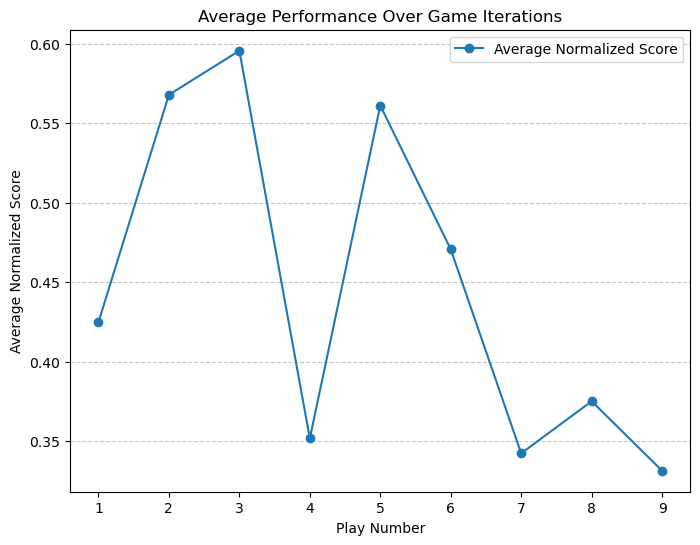

In [22]:
# Plot average normalized scores by play iteration
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(average_scores_by_play.index, average_scores_by_play.values, marker='o', label='Average Normalized Score')

plt.title('Average Performance Over Game Iterations')
plt.xlabel('Play Number')
plt.ylabel('Average Normalized Score')
plt.xticks(range(1, min(11, len(average_scores_by_play) + 1)))  # Limit to the first 10 plays
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

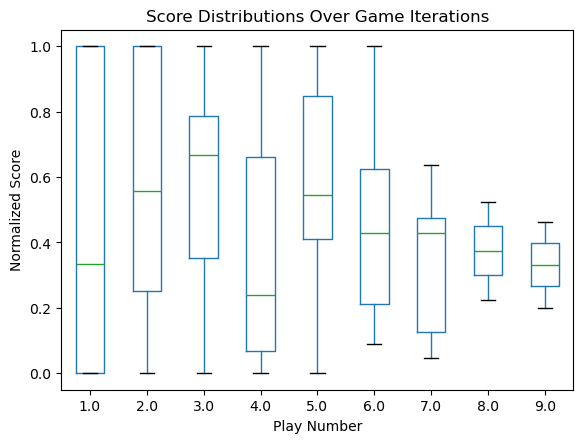

In [23]:
# Boxplot of scores by game iteration
plt.figure(figsize=(12, 6))
player_details_df[player_details_df['game_play_number'] <= 10].boxplot(
    column='normalized_score', by='game_play_number', grid=False, showfliers=False
)

plt.title('Score Distributions Over Game Iterations')
plt.suptitle('')
plt.xlabel('Play Number')
plt.ylabel('Normalized Score')
plt.show()
